In [1]:

from sklearn.cluster._hdbscan.hdbscan import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import  ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
  warnings.simplefilter("ignore")
np.random.seed(42)



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
key = "\t"
df = pd.read_excel(r"/content/drive/MyDrive/DA_Unigap/Machine Learning/Final_Project/churn_prediction.xlsx")
df.shape

(5630, 20)

In [11]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07


In [14]:
df['Churn'].unique()


array([0, 1])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Check Outlier

In [13]:
# Lấy các cột numeric trừ target
feature_cols = [col for col in df.select_dtypes(include=['float', 'int64']).columns if col != 'churn']

for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_pct = len(outliers) / len(df) * 100
    print(f'{col}: {outliers_pct:.2f}% outliers')


CustomerID: 0.00% outliers
Churn: 16.84% outliers
Tenure: 0.07% outliers
CityTier: 0.00% outliers
WarehouseToHome: 0.04% outliers
HourSpendOnApp: 0.11% outliers
NumberOfDeviceRegistered: 7.05% outliers
SatisfactionScore: 0.00% outliers
NumberOfAddress: 0.07% outliers
Complain: 0.00% outliers
OrderAmountHikeFromlastYear: 0.59% outliers
CouponUsed: 11.17% outliers
OrderCount: 12.49% outliers
DaySinceLastOrder: 1.10% outliers
CashbackAmount: 7.78% outliers


# Missing Value

In [16]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5626,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5627,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5628,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


<Axes: >

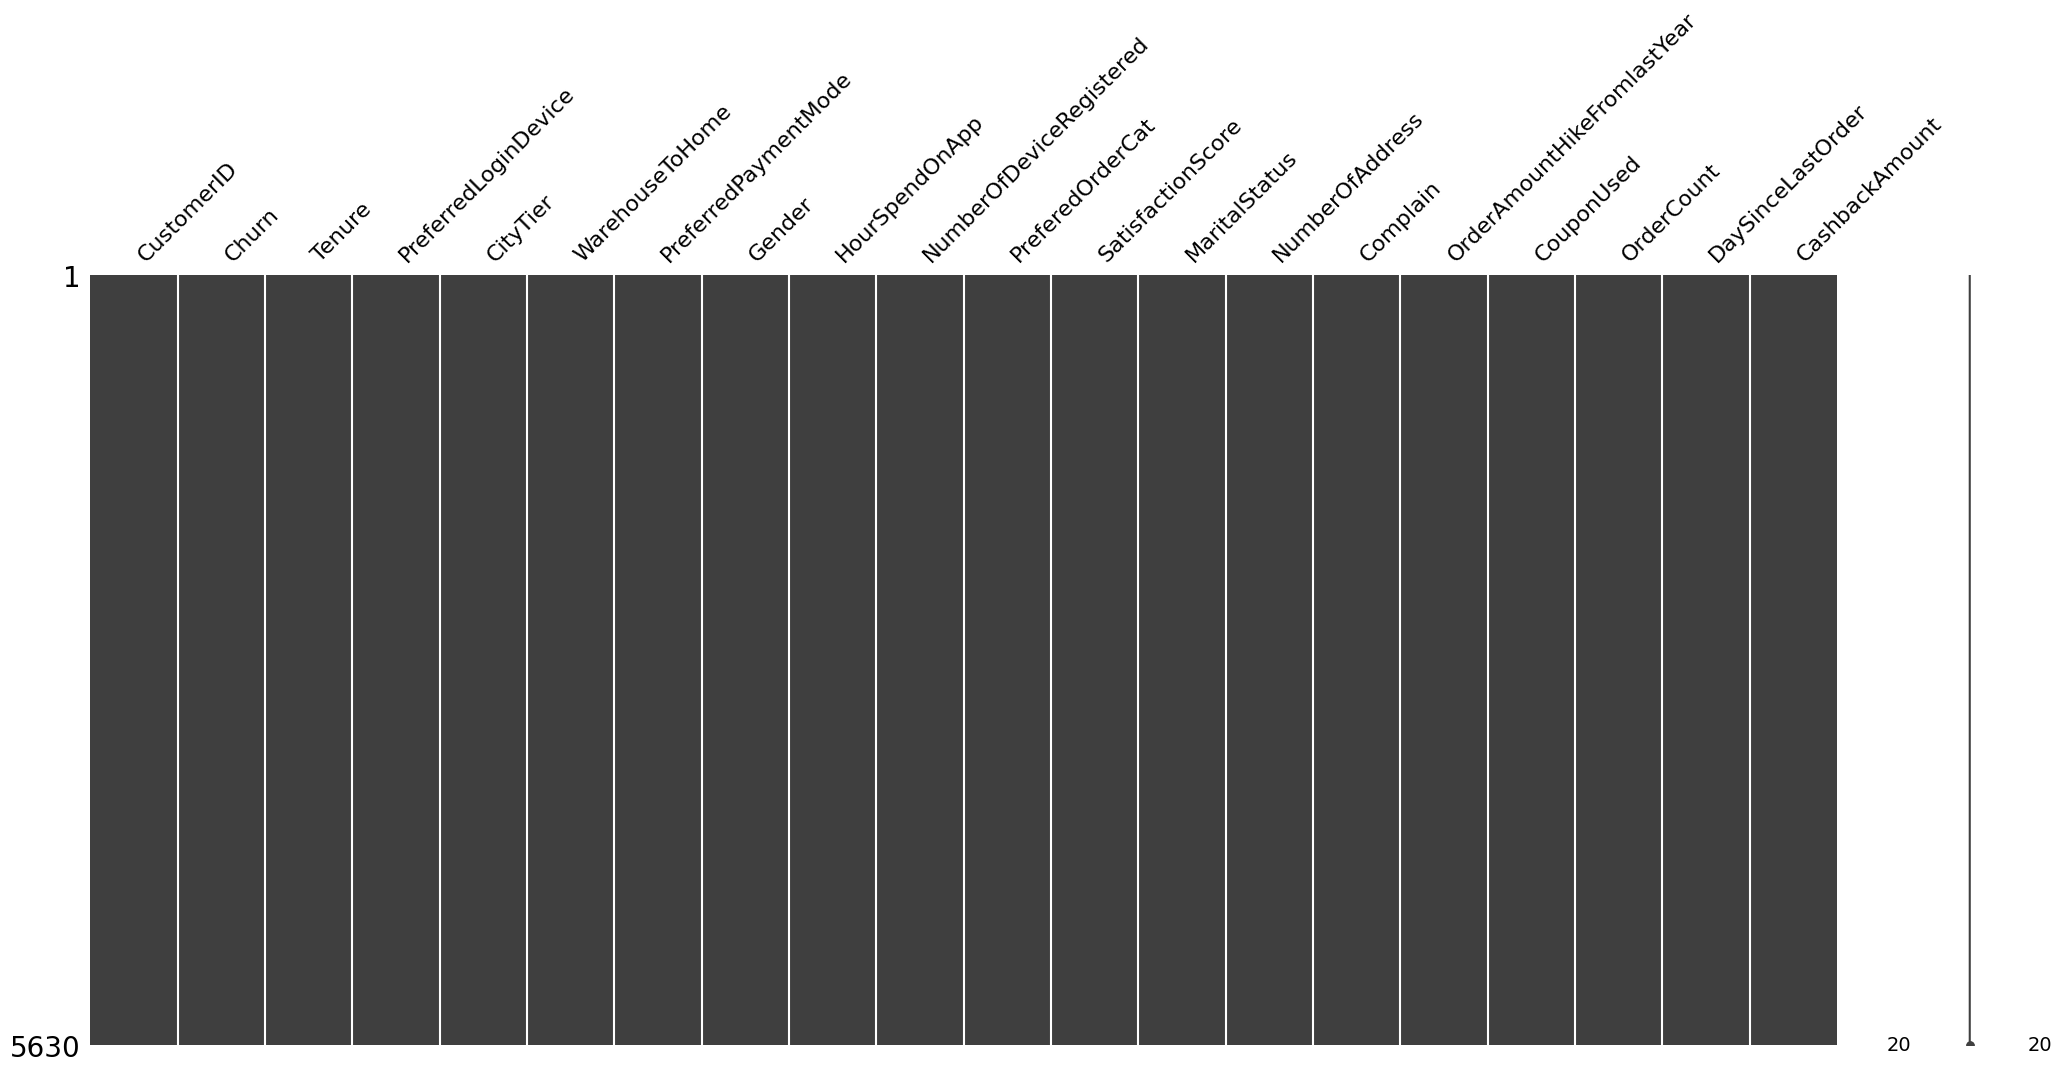

In [29]:
import missingno as msno
msno.matrix(df)

In [18]:
missing_rows_pct = df.isnull().any(axis=1).mean()*100
missing_rows_pct

np.float64(32.96625222024866)

In [19]:
# Xử lý missing value
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-220399394.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-220399394.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

# Duplicate

In [20]:
df.duplicated().any()

np.False_

In [21]:
df.head(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,3.0,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,2.0,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48


### Correlation Matrix

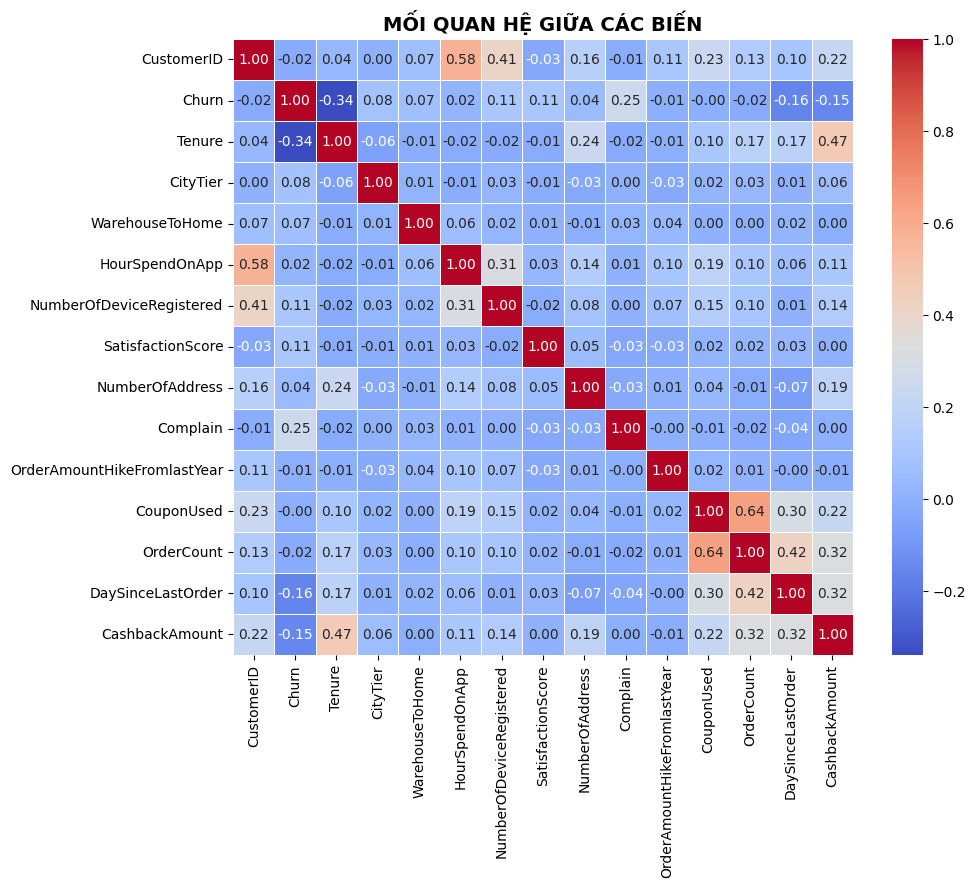

In [22]:
# Lọc numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate Matrix
corr = numeric_df.corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('MỐI QUAN HỆ GIỮA CÁC BIẾN', fontsize=14, fontweight='bold')
plt.show()

<Axes: xlabel='Churn', ylabel='Tenure'>

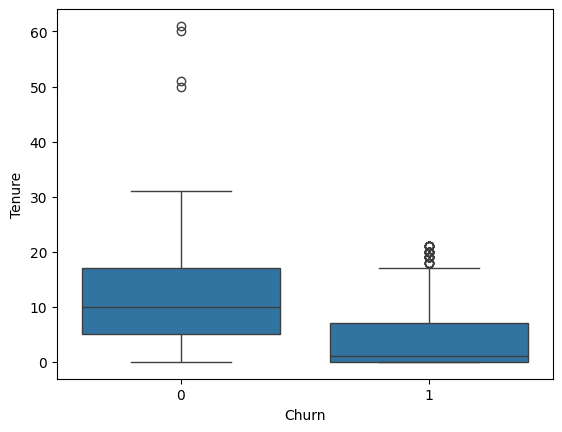

In [30]:
sns.boxplot(data = df,x = 'Churn', y = 'Tenure')

# Encoding

# 1. Supervised Learning

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

list_encode_cols = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
df_encoded = pd.get_dummies(df, columns=list_encode_cols, drop_first=True)

In [32]:
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,4.0,4,5,3,0,...,True,False,False,False,False,False,False,False,True,False
1,52942,0,13.0,1,9.0,4.0,4,3,2,0,...,False,False,False,False,False,False,False,False,False,True
2,52972,0,16.0,3,7.0,3.0,4,3,3,0,...,False,False,True,False,True,False,False,False,False,False
3,53125,0,5.0,1,16.0,3.0,4,4,3,0,...,False,False,True,False,False,False,False,False,True,False
4,53367,0,9.0,1,28.0,3.0,4,2,3,1,...,False,False,False,False,True,False,False,False,False,False


1.1. Split train/ validate/ test set




In [33]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of test set: {len(x_test)}")


Number data of train set: 4504
Number data of test set: 1126


1.2. Standardization for each set

To avoid Data Leakage - potentially misleading result.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

1.3. Apply Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'{name}: {acc:.4f}')


LogisticRegression: 0.8837
RandomForest: 0.9654
KNN: 0.8925


# Chọn model RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)


1.4. Model Evaluation

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score



In [44]:

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTest Accuracy:\n", round(accuracy_score(y_test, y_test_pred), 2))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Train Accuracy: 1.0

Test Accuracy:
 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3738
           1       1.00      1.00      1.00       766

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504


Confusion Matrix:
 [[3738    0]
 [   0  766]]
